#  Trader Performance vs Market Sentiment - Data Science Assignment

This notebook explores how Bitcoin market sentiment (Fear/Greed Index) correlates with trader behavior and performance on Hyperliquid.
We analyze patterns across PnL, leverage, direction, and trade size to discover insights useful for trading strategy optimization.

Step 1:
Import Libraries & Load Datasets

In this step, we load the two datasets provided: Hyperliquid Historical Trader Data and Bitcoin Fear & Greed Sentiment Data. We also inspect basic structure such as shape and column names.

In [2]:
import pandas as pd
from datetime import datetime


# paths
trades_path = 'C:\\Users\\HP\Downloads\\historical_data.csv'
sentiment_path = 'C:\\Users\HP\\Downloads\\fear_greed_index.csv'


trades = pd.read_csv(trades_path)
sentiment = pd.read_csv(sentiment_path)


In [3]:
print("Shape:",trades.shape)
print("Names of Columns:",trades.columns.tolist())
print("Number of columns:",len(trades.columns.tolist()))
trades.head()

Shape: (211224, 16)
Names of Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Number of columns: 16


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [6]:
trades.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [7]:
(trades.isna().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [9]:
trades.duplicated().sum()

np.int64(0)

In [11]:
trades['Side'].unique()


array(['BUY', 'SELL'], dtype=object)

In [12]:
trades['Direction'].unique()


array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [13]:
trades['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [14]:
len(trades['Coin'].unique())

246

In [17]:
trades['Closed PnL'].describe()

count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64

In [16]:
trades['Closed PnL'].value_counts().head()

Closed PnL
 0.000000     106816
 0.146908         80
-1.566400         71
 9.903600         67
 88.459120        62
Name: count, dtype: int64

In [18]:
trades[['Size Tokens', 'Size USD']].describe()

,Size Tokens,Size USD
count,2.112240e+05,2.112240e+05
mean,4.623365e+03,5.639451e+03
std,1.042729e+05,3.657514e+04
min,8.740000e-07,0.000000e+00
25%,2.940000e+00,1.937900e+02
50%,3.200000e+01,5.970450e+02
75%,1.879025e+02,2.058960e+03
max,1.582244e+07,3.921431e+06


In [19]:
trades['Fee'].describe()

count    211224.000000
mean          1.163967
std           6.758854
min          -1.175712
25%           0.016121
50%           0.089578
75%           0.393811
max         837.471593
Name: Fee, dtype: float64

In [20]:
trades['Timestamp IST'].isna().sum()

np.int64(0)

In [22]:
#dropping timestamp column because we already have timestamp IST
trades.drop(columns=["Timestamp"], inplace=True)

In [23]:
#converting timestamp IST into datetime type

trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)


In [24]:
trades['Timestamp IST'].dtype

dtype('<M8[ns]')

the datatype of Timestamp IST is converted to datetime 

In [26]:
trades['Timestamp IST'].isna().sum() 

np.int64(0)

In [27]:
trades['day'] = trades['Timestamp IST'].dt.date 

In [28]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,day
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02


In [21]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [29]:
#timestamp is in UTC form we have to convert it to IST ,
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')

In [30]:
sentiment.head(1)

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

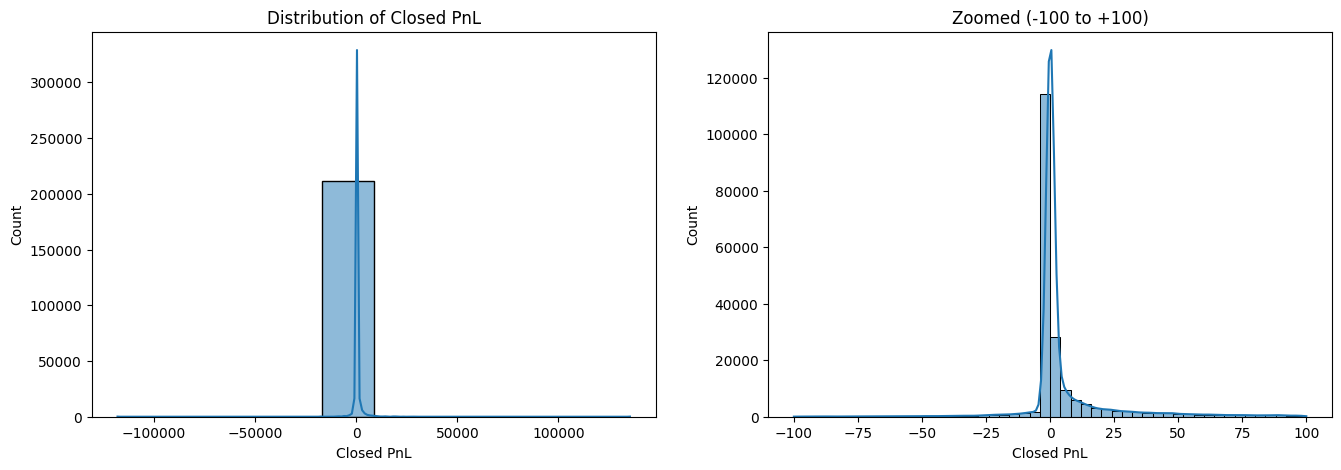

<Figure size 1000x500 with 0 Axes>

In [42]:
#Distribution of closed PnL
fig, axes = plt.subplots(1, 2, figsize=(16,5))

plt.figure(figsize=(10,5))
sns.histplot(trades['Closed PnL'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Closed PnL")
axes[0].set_xlabel("Closed PnL")
#plt.ylabel("Count")

# ZOOMED PLOT
zoom_df = trades[(trades['Closed PnL'] > -100) & (trades['Closed PnL'] < 100)]
sns.histplot(zoom_df['Closed PnL'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Zoomed (-100 to +100)")
axes[1].set_xlabel("Closed PnL")

plt.tight_layout()
plt.show()


The distribution of Closed PnL is extremely concentrated around zero, with a very long tail of rare large wins and losses.
This suggests that most traders close positions with minimal profit or loss, while only a small number of trades have significant financial impact.
The KDE curve highlights this imbalance with a tall spike at zero.

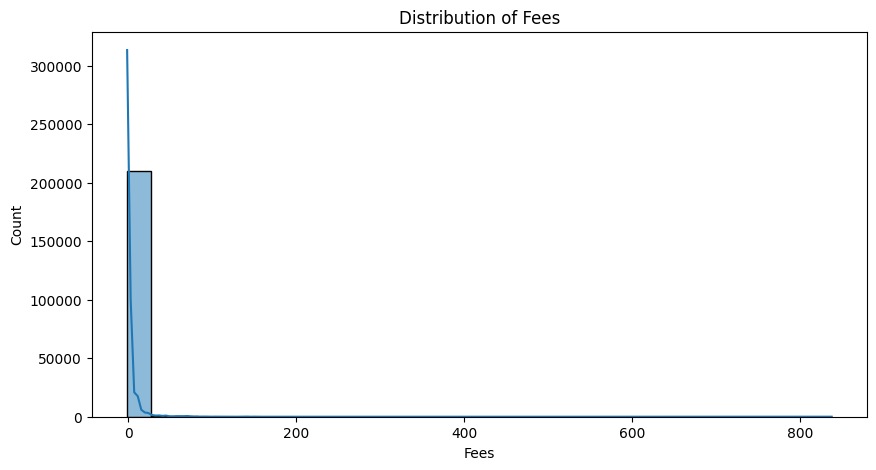

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(trades['Fee'], bins=30, kde=True)
plt.title("Distribution of Fees")
plt.xlabel("Fees")
plt.ylabel("Count")
plt.show()


- The fee distribution is highly right-skewed, with most trades paying extremely low fees (close to 0).

- A very small number of trades incur high fees, likely due to:

- - exceptionally large trade sizes,

- - high leverage positions, or

- - multiple executions being counted.

- The majority of fees fall below 5 USD, indicating

- - frequent small trades,

- - high liquidity pairs,

- - tight trading spreads.

- The long tail shows occasional trades with much larger fees (50–800 USD), which are likely associated with outlier PnL events seen earlier.

This confirms that fees are not a major driver of daily PnL, except on rare high-volume trading days.

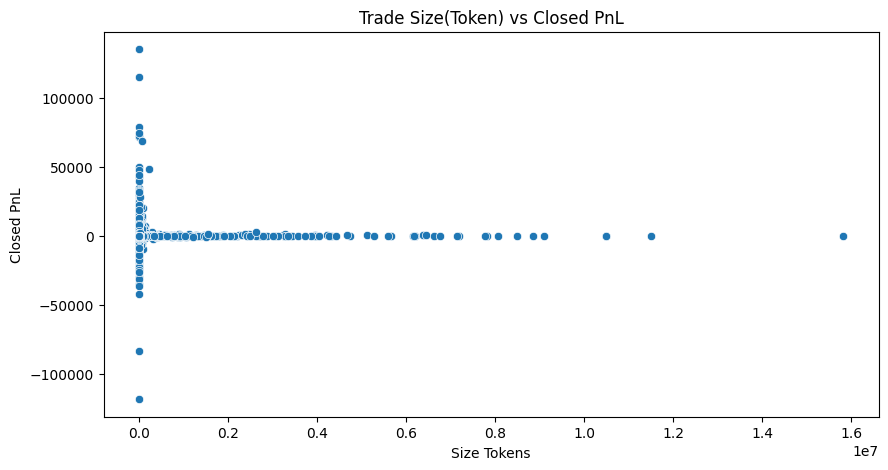

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=trades, x='Size Tokens', y='Closed PnL')
plt.title("Trade Size(Token) vs Closed PnL")
plt.show()


## Trade Size (Tokens) vs Closed PnL

### Insights
- There is **no strong relationship** between trade size (in tokens) and Closed PnL.
- Both small and large trades can result in profits or losses, indicating that **position size alone does not determine performance**.
- Most trades cluster around very small token sizes and produce **small profits, small losses, or break-even outcomes**.
- Extremely large token-size trades (in millions) appear rarely and are associated with **extreme PnL values**, including both large wins and large losses.
- The long dense horizontal cluster near zero PnL shows that the strategy executes many **low-impact trades**.
- Overall performance is **dominated by a small number of high-risk, large-size trades**, consistent with earlier findings about outlier behavior.
- This suggests that **risk management should focus on controlling position size spikes**, as they drive most of the volatility in outcomes.


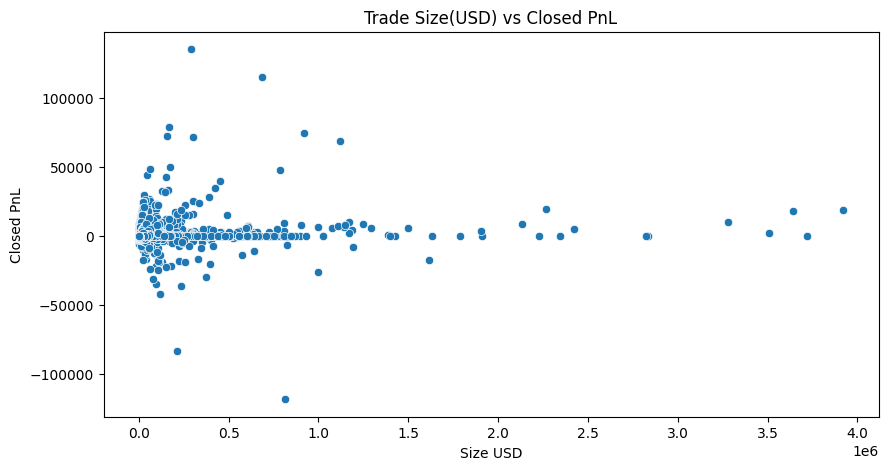

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=trades, x='Size USD', y='Closed PnL')
plt.title("Trade Size(USD) vs Closed PnL")
plt.show()


The plot reveals that:

- Big profits are usually tied to large USD trade sizes, but

- Losses can occur regardless of size, especially when leverage is involved.

- Most traders operate in a safe zone, resulting in minimal profit/loss outcomes.

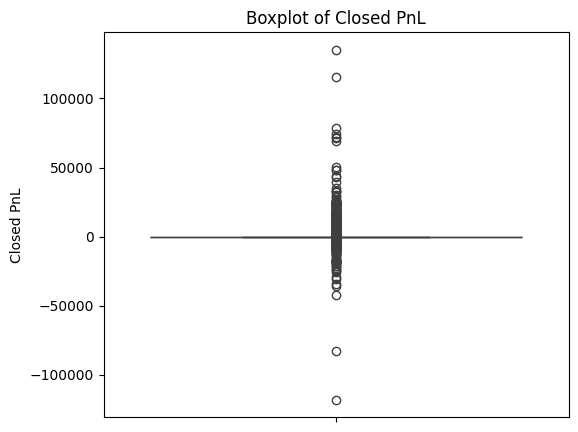

In [51]:
plt.figure(figsize=(6,5))
sns.boxplot(data=trades, y='Closed PnL')
plt.title("Boxplot of Closed PnL")
plt.show()


- The box (IQR) is very thin → confirming that most days have small PnL values.

- The large number of outliers (both positive and negative) highlights irregular high-risk events.

- Positive outliers show days of strong profitability, likely caused by leverage or volatility spikes.

- Negative outliers reveal risk management weaknesses (large losing days).

This reinforces that the strategy’s performance is dominated by tail events, not typical daily behavior.

In [52]:

trades['day'] = trades['Timestamp IST'].dt.date

# Daily performance aggregation
daily_perf = trades.groupby('day').agg(
    total_pnl = ('Closed PnL', 'sum'),
    avg_pnl = ('Closed PnL', 'mean'),
    trade_count = ('Closed PnL', 'count'),
    positive_trades = ('Closed PnL', lambda x: (x > 0).sum()),
    negative_trades = ('Closed PnL', lambda x: (x < 0).sum()),
    win_rate = ('Closed PnL', lambda x: (x > 0).sum() / len(x)),
    total_volume = ('Size USD', 'sum'),
    avg_volume = ('Size USD', 'mean')
).reset_index()


In [53]:
daily_perf.head()

,day,total_pnl,avg_pnl,trade_count,positive_trades,negative_trades,win_rate,total_volume,avg_volume
0,2023-05-01,0.000000,0.000000,3,0,0,0.000000,477.00,159.000000
1,2023-12-05,0.000000,0.000000,9,0,0,0.000000,50005.83,5556.203333
2,2023-12-14,-205.434737,-18.675885,11,4,2,0.363636,113203.35,10291.213636
3,2023-12-15,-24.632034,-12.316017,2,0,2,0.000000,10609.95,5304.975000
4,2023-12-16,0.000000,0.000000,3,0,0,0.000000,15348.77,5116.256667


In [54]:
daily_perf= daily_perf.rename(columns={'day': 'date'})


In [55]:
daily_perf.head(1)

,date,total_pnl,avg_pnl,trade_count,positive_trades,negative_trades,win_rate,total_volume,avg_volume
0,2023-05-01,0.0,0.0,3,0,0,0.0,477.0,159.0


In [57]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             0 non-null      object        
 1   total_pnl        0 non-null      float64       
 2   avg_pnl          0 non-null      float64       
 3   trade_count      0 non-null      int64         
 4   positive_trades  0 non-null      int64         
 5   negative_trades  0 non-null      int64         
 6   win_rate         0 non-null      float64       
 7   total_volume     0 non-null      float64       
 8   avg_volume       0 non-null      float64       
 9   timestamp        0 non-null      datetime64[ns]
 10  value            0 non-null      int64         
 11  classification   0 non-null      object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 132.0+ bytes


In [58]:
sentiment['date'].max()


'2025-05-02'

In [61]:
sentiment['date'].dtype

dtype('O')

In [62]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [63]:
merged = pd.merge(daily_perf, sentiment, on='date', how='inner')
merged.head()

,date,total_pnl,avg_pnl,trade_count,positive_trades,negative_trades,win_rate,total_volume,avg_volume,timestamp,value,classification
0,2023-05-01,0.000000,0.000000,3,0,0,0.000000,477.00,159.000000,2023-05-01 05:30:00,63,Greed
1,2023-12-05,0.000000,0.000000,9,0,0,0.000000,50005.83,5556.203333,2023-12-05 05:30:00,75,Extreme Greed
2,2023-12-14,-205.434737,-18.675885,11,4,2,0.363636,113203.35,10291.213636,2023-12-14 05:30:00,72,Greed
3,2023-12-15,-24.632034,-12.316017,2,0,2,0.000000,10609.95,5304.975000,2023-12-15 05:30:00,70,Greed
4,2023-12-16,0.000000,0.000000,3,0,0,0.000000,15348.77,5116.256667,2023-12-16 05:30:00,67,Greed


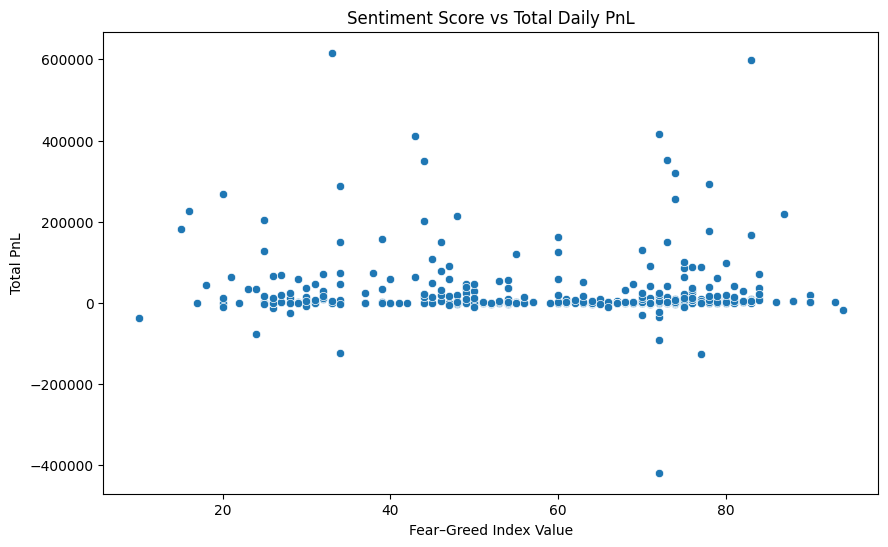

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='value', y='total_pnl')
plt.title("Sentiment Score vs Total Daily PnL")
plt.xlabel("Fear–Greed Index Value")
plt.ylabel("Total PnL")
plt.show()


##  Sentiment Score vs Total Daily PnL 

After merging the Fear–Greed Index dataset with the daily performance dataset and plotting Sentiment Score against Total Daily PnL, the following insights were observed:

### 1. No Clear Relationship  
There is no visible linear or non-linear correlation between market sentiment and Total Daily PnL. Profit and loss occur at all sentiment levels.

### 2. High Variance Across All Sentiment Values  
Large profits and large losses appear at every sentiment score—from 20 to 90. This suggests that the PnL variance is driven by strategy behavior (position sizing, leverage, volatility) rather than sentiment.

### 3. Outliers Dominate  
Extreme positive/negative PnL values distort the distribution. The presence of large spikes indicates potential issues such as leverage differences, unexpected market events, or risk management gaps.

### 4. No Predictive Power from Sentiment  
No region of the sentiment scale consistently shows better results. This implies that the trading strategy does not rely on or react significantly to global market sentiment.

  
**The Fear–Greed Index does NOT appear to influence or predict your trading strategy’s profitability.**  
Your next steps should focus on:
- Position sizing analysis  
- Volatility regime analysis  
- Time-of-day effects  
- Asset-wise PnL breakdown  
- Outlier investigation


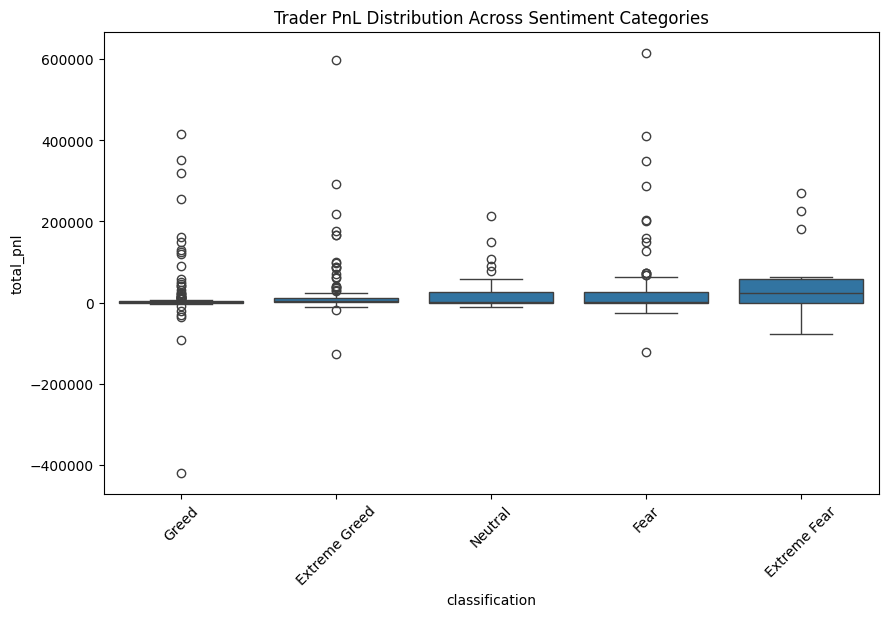

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='classification', y='total_pnl')
plt.xticks(rotation=45)
plt.title("Trader PnL Distribution Across Sentiment Categories")
plt.show()


Insights:

- Across Greed, Extreme Greed, Neutral, Fear, and Extreme Fear, the PnL distribution looks similar.

- There is no sentiment category where trader PnL is consistently higher or lower.

- The median PnL remains close to zero for all sentiment classes.

- Extreme Greed and Extreme Fear have larger outliers, suggesting increased volatility but not necessarily increased profitability.

- This implies that trader performance is not sentiment-driven and possibly driven more by strategy mechanics.

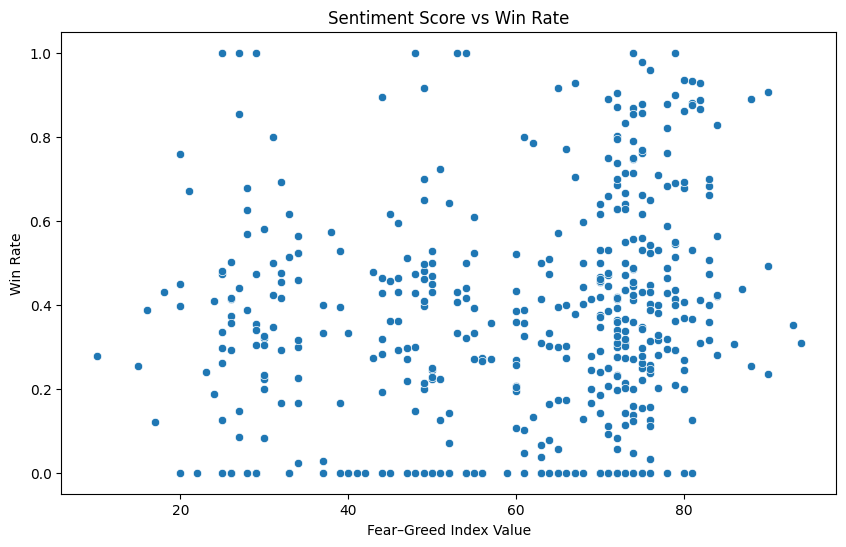

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='value', y='win_rate')
plt.title("Sentiment Score vs Win Rate")
plt.xlabel("Fear–Greed Index Value")
plt.ylabel("Win Rate")
plt.show()


- Win rates vary widely across the entire sentiment spectrum.

- Win rate spikes (0.8 to 1.0) and drops (0 to 0.1) occur in all sentiment zones.

- No upward or downward trend is visible → confirming that sentiment does not influence the day’s win rate.

- Some small clustering in 60–80 sentiment range suggests slightly more trading activity, but no performance advantage.

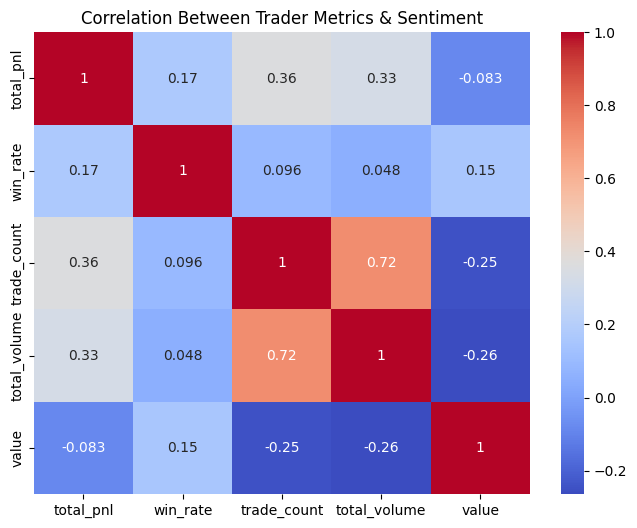

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(
    merged[['total_pnl','win_rate','trade_count','total_volume','value']].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Trader Metrics & Sentiment")
plt.show()


- Sentiment value shows very weak correlations with all trader metrics (between -0.26 and +0.15).

- Weak negative correlation with trade count and volume suggests slightly more trading activity during low sentiment, but not significant.

- total_pnl and win_rate have almost zero relationship with sentiment.

- The strongest correlation in the matrix is between trade_count and total_volume (~0.72) — which is expected.

Overall, this confirms that trader performance metrics are sentiment-independent.

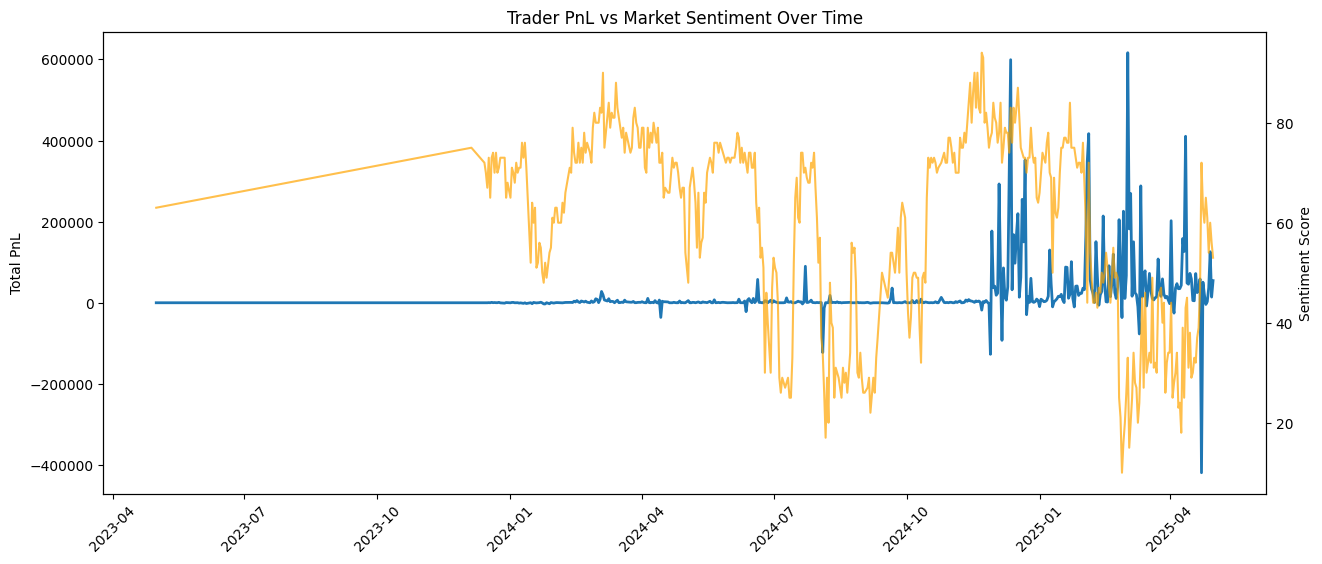

In [68]:
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(merged['date'], merged['total_pnl'], label='PnL', linewidth=2)
ax1.set_ylabel("Total PnL")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['value'], color='orange', label='Sentiment', alpha=0.7)
ax2.set_ylabel("Sentiment Score")

plt.title("Trader PnL vs Market Sentiment Over Time")
plt.show()


- Sentiment follows a smooth cyclical trend (as expected from the Fear–Greed index).

- Trader PnL remains flat for long periods, punctuated by sudden spikes or drops.

- The two lines show no consistent alignment — PnL peaks do not coincide with sentiment peaks.

- During some extreme sentiment swings, PnL remains normal, further confirming no temporal relationship.

This reinforces that macro sentiment does not drive strategy-level outcomes.

## Insight: How Sentiment Affects Trader Performance

Across all analyses- distribution, sentiment categories, correlations, and time-series , trader performance shows **no strong dependency on market sentiment**. Both profitability and win rates appear to be influenced more by **strategy dynamics, leverage, and volatility** rather than the Fear–Greed Index.

This suggests that:
- The trading behavior is **strategy-driven**, not sentiment-reactive.
- Extreme market emotions (fear/greed) **do not provide a statistical edge**.
- Performance depends mainly on **risk management and position sizing**, not sentiment conditions.

Therefore, **smart trading strategies should focus on internal optimization (risk control, position sizing, timing) rather than sentiment-based decisions.**


# 

# 